In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ml import MLHelper

In [3]:
# Binance API parameters
traded_asset = 'DOGE'
stable_asset = 'USDT'
start_date = "Jan 01, 2021"
end_date = "Dec 31, 2021"
time_horizon = '1hr'

# EMA parameters
alpha_value = 0.5

# labeling parameters
trend_reversal_factor = 0.3
change_tolerance = 1
forward_term = 8
break_away_point = 2

history_length = 128

In [4]:
df = pd.read_csv(f"data/labeled/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_{trend_reversal_factor}_{change_tolerance}_{forward_term}_{break_away_point}_long_utility.csv")
df['change'] = 100 * (df['close'] - df['open']) / df['open']
df = df[['change', 'long_utility_context_ema']]


In [5]:
df

,change,long_utility_context_ema
0,-0.939093,0.555477
1,3.553466,0.448644
2,1.453173,0.338697
3,4.604052,0.158059
4,2.127397,0.110455
...,...,...
8687,-1.039861,0.732017
8688,0.116754,0.714774
8689,0.874636,0.660699
8690,1.156069,0.549048


In [6]:
mlHelper = MLHelper(df=df, history_length=history_length)

train_features, train_labels = mlHelper.create_features_labels()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-26 19:24:24.793113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-26 19:24:24.793144: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
eval_start_point = int(0.7*len(df))
test_start_point = int(0.9*len(df))

x_train, x_eval, x_test = train_features[:eval_start_point], train_features[eval_start_point:test_start_point], train_features[test_start_point:]
y_train, y_eval, y_test = train_labels[:eval_start_point], train_labels[eval_start_point:test_start_point], train_labels[test_start_point:]

In [8]:
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape, x_test.shape, y_test.shape

((6084, 128, 1), (6084,), (1738, 128, 1), (1738,), (742, 128, 1), (742,))

In [9]:
history = mlHelper.train(x_train=x_train, y_train=y_train, x_eval=x_eval, y_eval=y_eval)

2023-02-26 19:24:29.613812: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 19:24:30.130042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-26 19:24:30.254130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-26 19:24:30.390942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-26 19:24:33.833312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-26 19:24:33.879245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


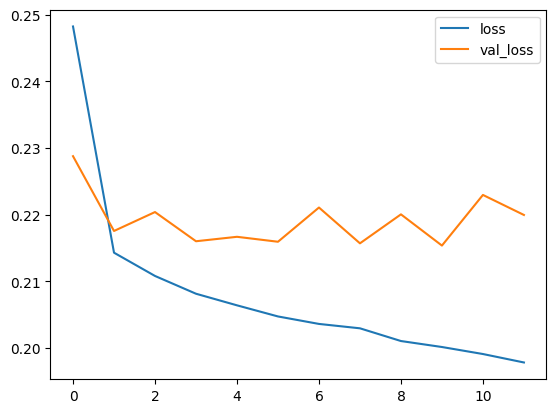

In [10]:
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()

In [11]:
mlHelper.lstm_model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 9ms/step - loss: 0.2266 - mean_absolute_error: 0.2266


[0.22664357721805573, 0.22664357721805573]

In [12]:
pred = mlHelper.lstm_model.predict(x_test)

18/24 [=====================>........] - ETA: 0s

2023-02-26 19:25:28.081831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-26 19:25:28.121059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 7ms/step


In [13]:
start = 45
end = 100

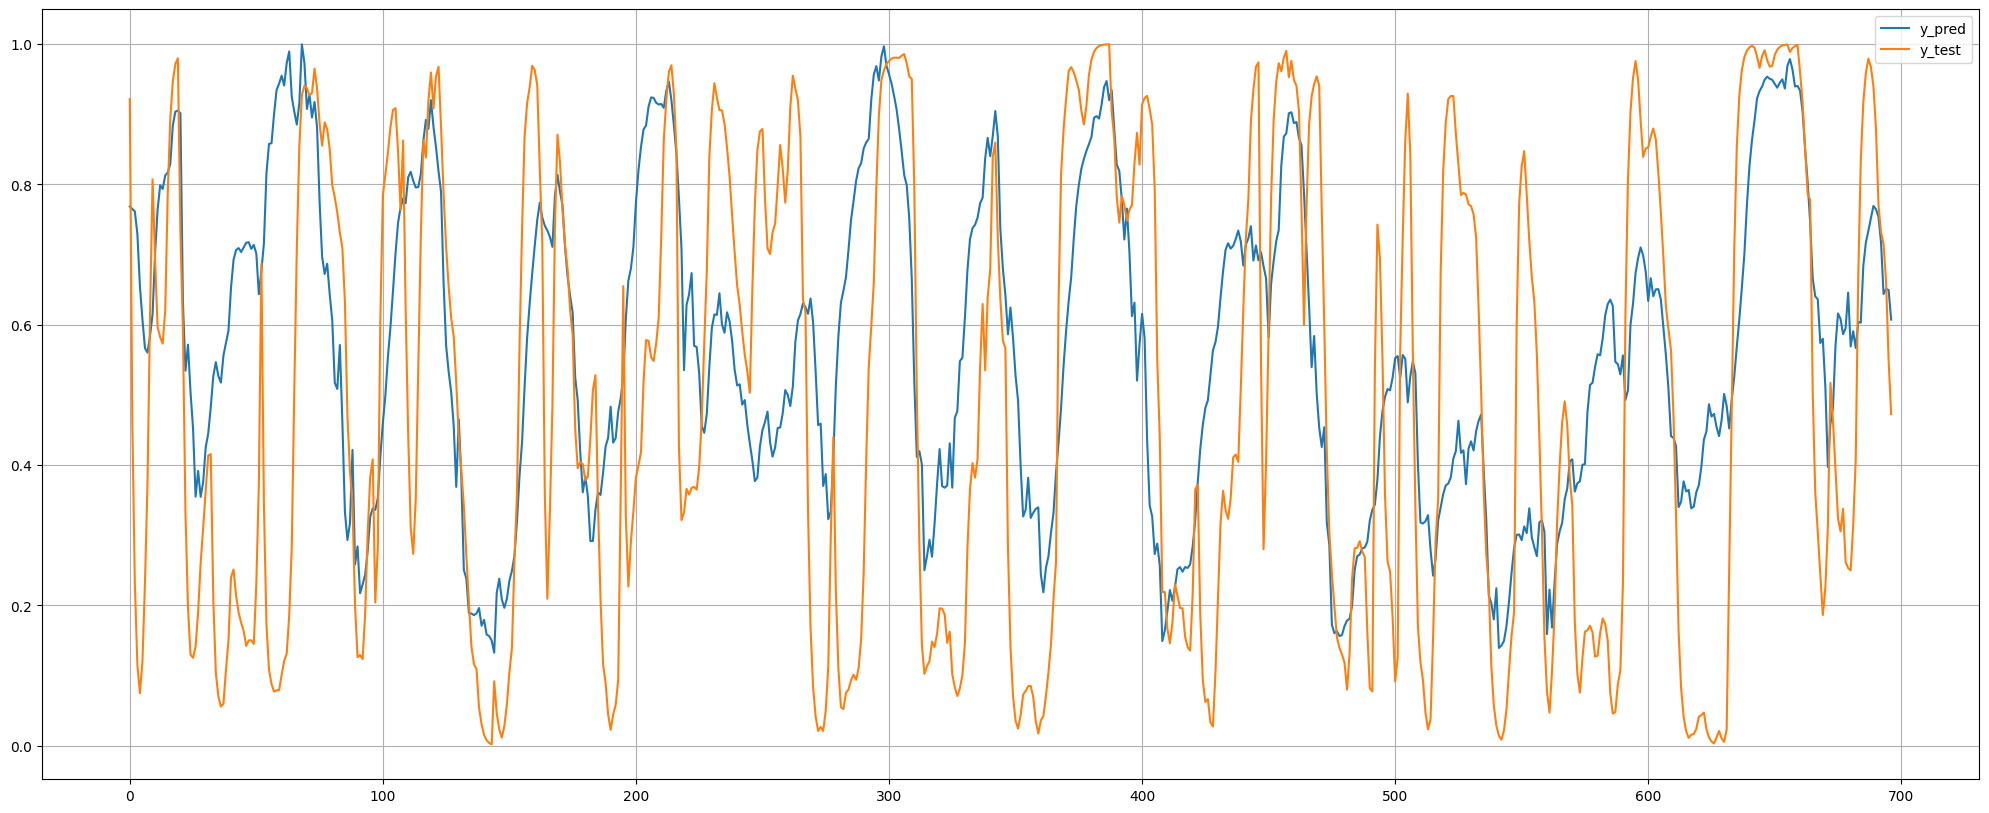

In [14]:
plt.figure(figsize=(25, 10))
plt.plot(pred[start:], label='y_pred')
plt.plot(y_test[start:], label='y_test')
plt.legend()
plt.grid()

In [15]:
pd.DataFrame(history).to_csv(f"data/training/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_{trend_reversal_factor}_{change_tolerance}_{forward_term}_{break_away_point}_training.csv")

AttributeError: 'dict' object has no attribute 'history'

In [108]:
prediction_df = pd.DataFrame(columns=['test', 'prediction'])

prediction_df['test'] = y_test
prediction_df['prediction'] = pred

prediction_df.to_csv(f"data/training/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_{trend_reversal_factor}_{change_tolerance}_{forward_term}_{break_away_point}_prediction.csv")